In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

from urllib.request import urlretrieve

urlretrieve(medical_charges_url, 'medical.csv')



('medical.csv', <http.client.HTTPMessage at 0x103f03dc0>)

In [2]:
import pandas as pd

medical_df = pd.read_csv('medical.csv')


In [3]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
%pip install plotly


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [10]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [20]:
fig = px.histogram(medical_df,x='age',marginal='box',nbins=47,title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [26]:
fig = px.histogram(medical_df,x='bmi',marginal='box', color_discrete_sequence=['red'], title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [32]:
fig = px.histogram(medical_df, x='charges', color='smoker', marginal='box', color_discrete_sequence=['grey','green'], title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [35]:
fig = px.histogram(medical_df, x='charges', color='sex', marginal='box', color_discrete_sequence=['grey','green'], title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [37]:
fig = px.histogram(medical_df, x='charges', color='region', marginal='box', color_discrete_sequence=['grey','green','red','blue'], title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [33]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [34]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [38]:
px.histogram(medical_df, x='smoker', color='region', title='Smoker')

In [39]:
px.histogram(medical_df, x='smoker', color='children', title='Smoker')

In [42]:
fig = px.scatter(medical_df,x='age', y='charges', color='smoker', opacity=0.8, hover_data=['sex'], title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [43]:
fig = px.scatter(medical_df,x='bmi', y='charges', color='smoker', opacity=0.8, hover_data=['sex'], title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [51]:
fig = px.violin(medical_df,x='children', y='charges', title='Children vs. Charges')
#fig.update_traces(marker_size=5)
fig.show()

In [52]:
fig = px.violin(medical_df,x='sex', y='charges',title='Sex vs. Charges')
#fig.update_traces(marker_size=5)
fig.show()

In [53]:
fig = px.violin(medical_df,x='region', y='charges',  title='Region vs. Charges')
#fig.update_traces(marker_size=5)
fig.show()

In [57]:
fig = px.violin(medical_df,x='smoker', y='charges',  title='Smoker vs. Charges')
#fig.update_traces(marker_size=5)
fig.show()

In [59]:
print(medical_df.charges.corr(medical_df.age))
print(medical_df.charges.corr(medical_df.bmi))

smoker_values={'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
print(medical_df.charges.corr(smoker_numeric))

0.2990081933306478
0.19834096883362887
0.7872514304984778


In [60]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [61]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

<AxesSubplot:title={'center':'Age vs. Charges'}, xlabel='age', ylabel='charges'>

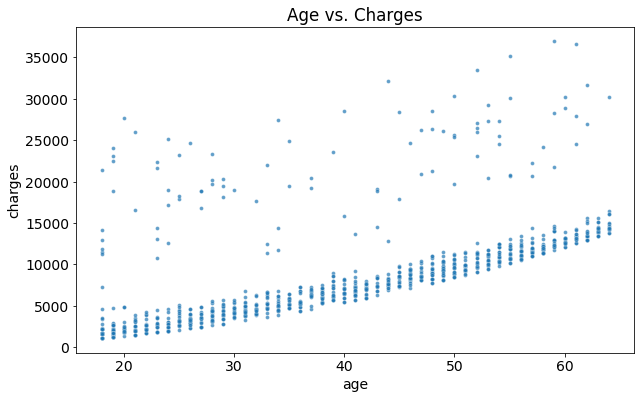

In [68]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)

In [69]:
def estimate_charges(age, w, b):
    return w*age + b

In [70]:
w = 50
b = 100

In [71]:
estimate_charges(30, w, b)

1600

In [73]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [79]:
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [80]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0, 0.5, 'Estimated Charges')

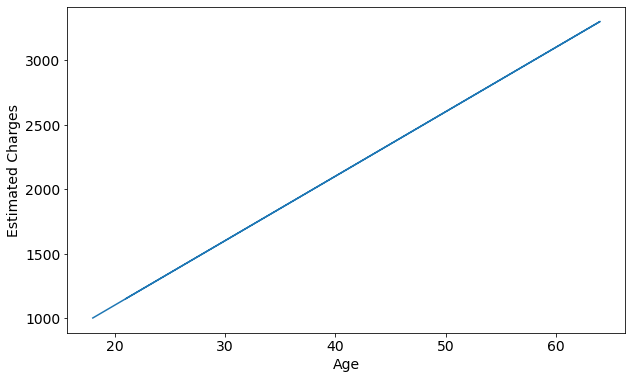

In [81]:
plt.plot(ages, estimated_charges)
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

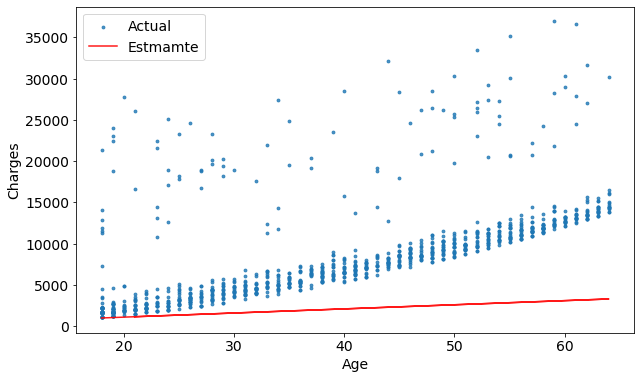

In [87]:
target = non_smoker_df.charges
plt.scatter(ages, target, s=8, alpha=0.8)
plt.plot(ages, estimated_charges, 'r', alpha=0.9)


plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Actual', 'Estmamte'])

In [88]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages,w,b)
    
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)

    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Actual', 'Estmamte'])

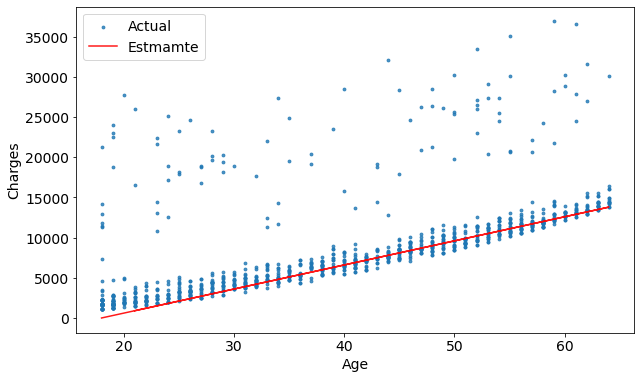

In [106]:
try_parameters(300,-5400)

In [110]:
import numpy as np

In [111]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [116]:
targets = non_smoker_df['charges']
w = 300
b = -5400
predicted = estimate_charges(non_smoker_df.age, w, b)

In [117]:
rmse(targets, predicted)

5101.61979008543

In [143]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    

    
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.plot(ages, predictions, 'r', alpha=0.9)

    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Actual', 'Estimate'])
    
    loss = rmse(target,predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  4784.579833950967


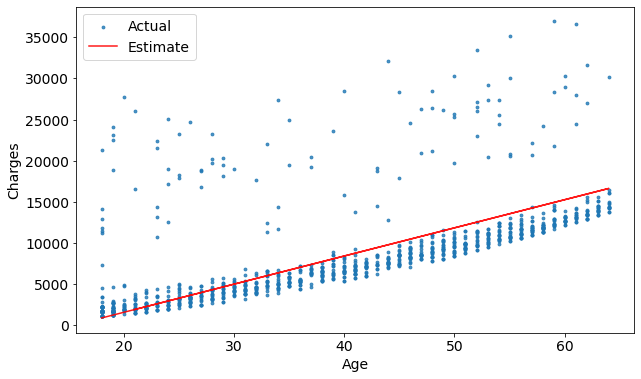

In [144]:
try_parameters(342,-5250)

In [145]:
%pip install scikit-learn --quiet


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [147]:
from sklearn.linear_model import LinearRegression

In [148]:
model = LinearRegression()

In [150]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [154]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targets.shape :', targets.shape)

inputs.shape : (1064, 1)
targets.shape : (1064,)


In [159]:
model.fit(inputs,target)

LinearRegression()

In [160]:
model.predict(np.array([[23],[37],[61]]))

/Users/hydra/.local/share/virtualenvs/hydra-pv6abQiz/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [161]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [162]:
rmse(targets,predictions)

4662.505766636395

In [163]:
model.coef_

array([267.24891283])

In [164]:
model.intercept_

-2091.420556565021

RMSE Loss:  4662.505766636395


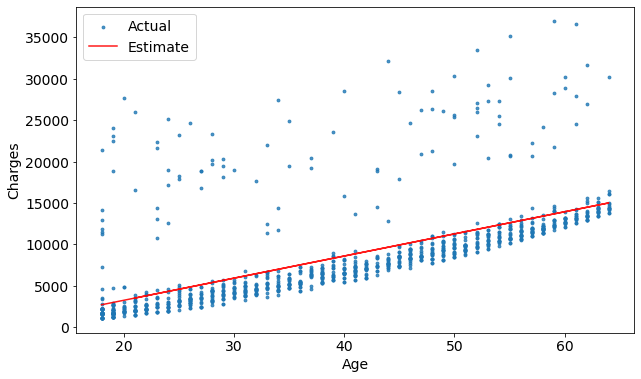

In [165]:
try_parameters(model.coef_,model.intercept_)

In [166]:
from sklearn.linear_model import SGDRegressor
model2 = SGDRegressor()

In [167]:
help(model2.fit)

Help on method fit in module sklearn.linear_model._stochastic_gradient:

fit(X, y, coef_init=None, intercept_init=None, sample_weight=None) method of sklearn.linear_model._stochastic_gradient.SGDRegressor instance
    Fit linear model with Stochastic Gradient Descent.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape (n_samples, n_features)
        Training data.
    
    y : ndarray of shape (n_samples,)
        Target values.
    
    coef_init : ndarray of shape (n_features,), default=None
        The initial coefficients to warm-start the optimization.
    
    intercept_init : ndarray of shape (1,), default=None
        The initial intercept to warm-start the optimization.
    
    sample_weight : array-like, shape (n_samples,), default=None
        Weights applied to individual samples (1. for unweighted).
    
    Returns
    -------
    self : object
        Fitted `SGDRegressor` estimator.



In [168]:
model2.fit(inputs,targets)

SGDRegressor()

In [169]:
model2.coef_

array([413.52326668])

In [170]:
model2.intercept_

array([-6496.66057841])

In [171]:
predictions = model2.predict(inputs)

rmse(targets,predictions)

5274.182824915797

RMSE Loss:  5274.182824915797


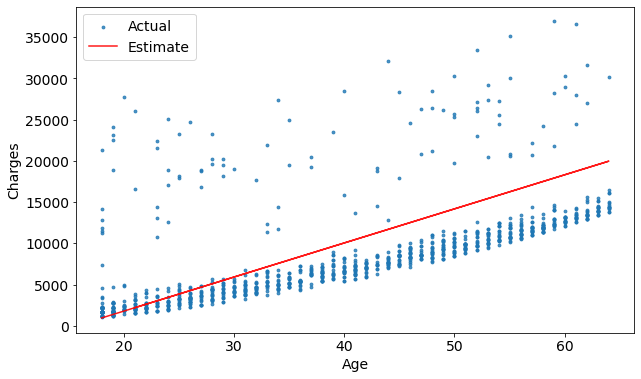

In [172]:
try_parameters(model2.coef_,model2.intercept_)

In [173]:
smoker_df = medical_df[medical_df.smoker =='yes']
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [175]:
smoker_input = smoker_df[['age']]
smoker_input

,age
0,19
11,62
14,27
19,30
23,34
...,...
1313,19
1314,30
1321,62
1323,42


In [177]:
smoker_target = smoker_df.charges
smoker_target

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [178]:
model3 = LinearRegression()
model3.fit(smoker_input,smoker_target)

LinearRegression()

In [180]:
smoker_preds = model3.predict(smoker_input)
rmse(smoker_target,smoker_preds)

10711.00334810241

In [181]:
def try_parameters_smokers(w,b):
    ages = smoker_df.age
    target = smoker_df.charges
    
    estimated_charges = estimate_charges(ages,w,b)
    
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)

    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Actual', 'Estmamte'])

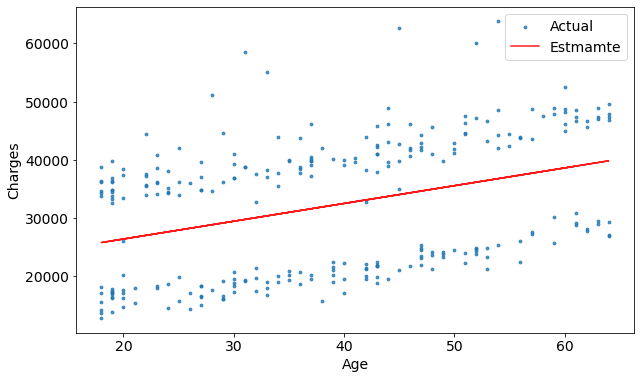

In [182]:
try_parameters_smokers(model3.coef_,model3.intercept_)

In [184]:
bmi_input = non_smoker_df[['bmi']]

model_bmi = LinearRegression().fit(bmi_input,targets)

In [185]:
model_bmi.coef_

array([83.35055766])

In [186]:
model_bmi.intercept_

5879.424081872972

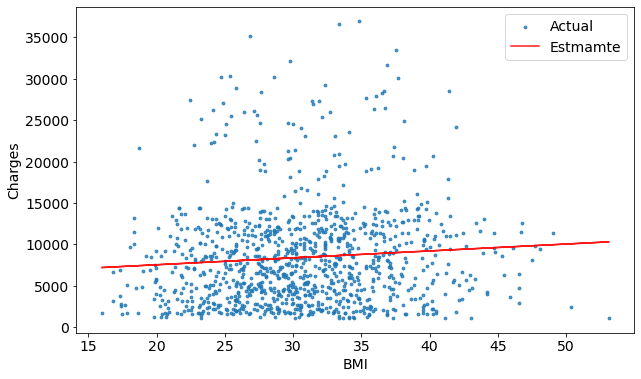

In [187]:

    
estimated_charges = estimate_charges(bmi_input,model_bmi.coef_, model_bmi.intercept_)
    
plt.scatter(bmi_input, target, s=8, alpha=0.8)
plt.plot(bmi_input, estimated_charges, 'r', alpha=0.9)

plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(['Actual', 'Estmamte'])


In [188]:
rmse(targets,model_bmi.predict(bmi_input))

5969.772531913293

<AxesSubplot:xlabel='smoker', ylabel='charges'>

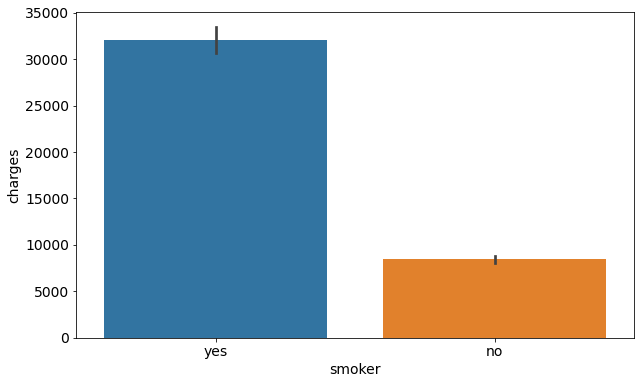

In [189]:
sns.barplot(data=medical_df, x='smoker', y='charges')

In [191]:
smoker_codes = {'no':0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [192]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984778

In [194]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df.charges
model = LinearRegression().fit(inputs,targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  6056.439217188081


In [201]:
sex_codes = {'female': 0, 'male': 1}

medical_df['sex_code'] = medical_df.sex.map(sex_codes)
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df.charges
model = LinearRegression().fit(inputs,targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss: ", loss)


Loss:  6056.100708754546


<AxesSubplot:xlabel='region', ylabel='charges'>

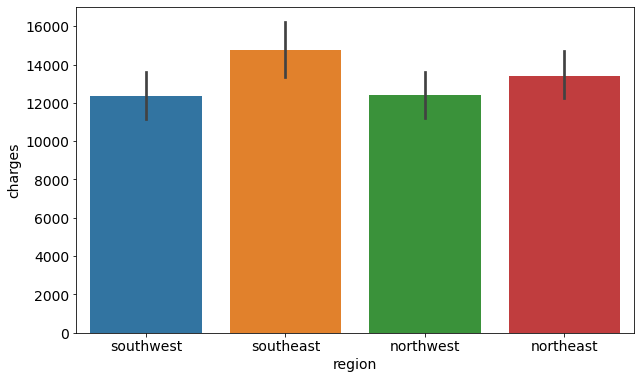

In [202]:
sns.barplot(data=medical_df, x='region', y='charges')

In [203]:
from sklearn import preprocessing 
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [204]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [207]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [208]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']], medical_df.charges
model = LinearRegression().fit(inputs,targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss: ", loss)



Loss:  6041.6796511744515


In [209]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [210]:
model.intercept_

-12525.547811195458

In [212]:
non_smoker_df = medical_df[medical_df.smoker == 'no']
smoker_df = medical_df[medical_df.smoker == 'yes']

In [214]:
inputs, targets = non_smoker_df[['age', 'bmi', 'children', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']], non_smoker_df.charges
model = LinearRegression().fit(inputs,targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  4573.074988795493


In [215]:
inputs, targets = smoker_df[['age', 'bmi', 'children', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']], smoker_df.charges
model = LinearRegression().fit(inputs,targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  5668.4678821121515


In [216]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

model = LinearRegression().fit(inputs, targets)


weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [218]:
from sklearn.preprocessing import StandardScaler

In [219]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [221]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [222]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [223]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [225]:
medical_df[numeric_cols]

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [226]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [229]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
inputs

array([[-1.43876426, -0.45332   , -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [-1.50996545,  0.5096211 , -0.07876719, ...,  0.        ,
         1.        ,  0.        ],
       [-0.79795355,  0.38330685,  1.58092576, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ...,  0.        ,
         1.        ,  0.        ],
       [-1.29636188, -0.79781341, -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.        ,
         0.        ,  0.        ]])

In [230]:
targets = medical_df.charges

model = LinearRegression().fit(inputs,targets)

predictions = model.predict(inputs)

loss = rmse(targets,predictions)
print("Loss: ", loss)

Loss:  6041.679651174452
